In [2]:
# Requerimientos
!pip install graphviz
# sudo apt-get install graphviz cmd

In [3]:
from film_user import Store, UserFactory
import os
from graphviz import Digraph, Graph

In [27]:
storefn = os.path.expanduser("~/movies.n3")
userfn = os.path.expanduser("~/users.n3")

storeuri = "file://" + storefn
useruri = "file://" + userfn

title_store = "Movie Theater"
title_user = "Fábrica de usuarios"

s = Store(storefn, storeuri, title_store)
u = UserFactory(userfn, useruri, title_user)

# Usuarios

In [4]:
#!python3 film_user.py newuser "miriam <miriam@uni.pe>"

<h3>Lista de usuarios</h3>

In [5]:
!python3 film_user.py listofusers

cesar44
jesus
felipeturing
katherine15
miriam
edmundo
jbardalesr


<h3>Establecemos las amistades</h3>

In [15]:
!python3 film_user.py setfriends edmundo felipeturing

Amistad establecida


<h3>Lista de amigos</h3>

In [14]:
!python3 film_user.py listoffriends

Walter Felipe es amig@ de Jordi Bardales
Walter Felipe es amig@ de Miriam
Miriam es amig@ de Walter Felipe
Jordi Bardales es amig@ de Walter Felipe
Miriam es amig@ de Jesus Torrejon
Jesus Torrejon es amig@ de Miriam


<h3>Lista de amigos en un grafo</h3>

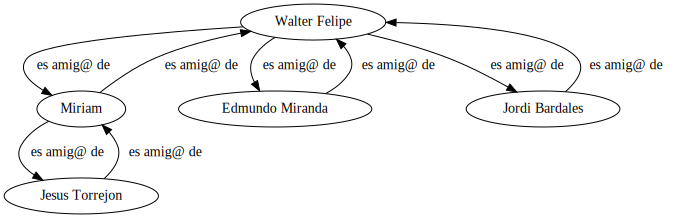

In [22]:
g = Digraph()
for data_friend in u.list_friends():
    g.edge(data_friend[0], data_friend[1], label="es amig@ de")
g

<h3>Amigos de</h3>

Amigos de felipeturing


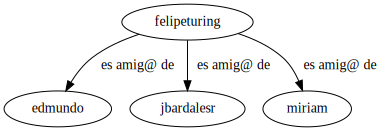

In [28]:
g = Digraph()
nick = "felipeturing"
for data_friend in u.list_friends_of_nick(nick):
    g.edge(nick, data_friend[0], label="es amig@ de")
print("Amigos de %s"%nick)
g

# Películas

In [9]:
#https://www.imdb.com/title/tt1754656/
#https://www.imdb.com/title/tt0441773/
#https://www.imdb.com/title/tt0468569/
#https://www.imdb.com/title/tt1216475/

In [36]:
!python3 film_user.py newmovie https://www.imdb.com/title/tt1216475/

Película : b'Cars 2'
Año : 2011
Género :  Animation Adventure Comedy Family Sci-Fi Sport 
Dirigida por: b'John Lasseter'
Dirigida por: b'Bradford Lewis'
Actores principales:
b'Larry the Cable Guy' como Mater
b'Owen Wilson' como Lightning McQueen


In [45]:
!python3 film_user.py listofmovies

https://www.imdb.com/title/tt0816692/ - Interstellar
https://www.imdb.com/title/tt1754656/ - The Little Prince
https://www.imdb.com/title/tt0468569/ - The Dark Knight
https://www.imdb.com/title/tt0441773/ - Kung Fu Panda
https://www.imdb.com/title/tt0479952/ - Madagascar: Escape 2 Africa
https://www.imdb.com/title/tt0110357/ - The Lion King
https://www.imdb.com/title/tt0126029/ - Shrek
https://www.imdb.com/title/tt1300854/ - Iron Man 3
https://www.imdb.com/title/tt0120338/ - Titanic
https://www.imdb.com/title/tt1375666/ - Inception
https://www.imdb.com/title/tt0461770/ - Enchanted


In [12]:
#!python3 film_user.py review felipeturing "The Dark Knight"
python3 film_user.py review edmundo "Iron Man 3"

<h3>Películas por director</h3>

In [10]:
!python3 film_user.py moviebydirector "Christopher Nolan"

Enchanted - Kevin Lima - Romance - 2007
Enchanted - Kevin Lima - Family - 2007
Enchanted - Kevin Lima - Comedy - 2007
Enchanted - Kevin Lima - Musical - 2007
Enchanted - Kevin Lima - Fantasy - 2007


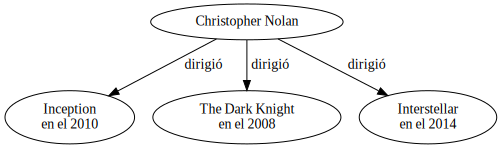

In [3]:
director_name = "Christopher Nolan"
g = Digraph()

for movie in s.movies_by_director(director_name):
    g.edge(director_name, "%s\nen el %s"%movie, label="dirigió")
g

In [15]:
!python3 film_user.py review jordi15 "Inception"

In [30]:
for data_friend in s.movie_by_url("<https://www.imdb.com/title/tt0468569/>"):
    print(data_friend)

<h3>Películas por actor</h3>

In [1]:
!python3 film_user.py moviebyactor "Amy Adams"

Título: Enchanted
Director: Kevin Lima
Año:2007


<h3>Películas vistas por el usuario</h3>

In [2]:
!python3 film_user.py usermovies jbardalesr

Titanic
The Dark Knight
Kung Fu Panda
Superman
Shrek
The Lion King


Iron Man 3
Inception
The Lion King
Titanic


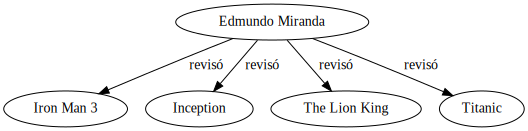

In [4]:
nickname = "edmundo"
name = str(list(u.user_by_nick(nickname))[0][1])
g = Digraph()
for movie in s.list_movies_user(u.get_user_uri(nickname)):
    g.edge(name, "%s"%movie, label="revisó")
    print("%s" % movie)
g

In [35]:
!python3 film_user.py topratedmovies 0 10

╒═════════════════════════════╤═════════════════════╤════════════════════════════╤═══════════════╕
│ Película                    │   Número de reviews │   Valoración promedio(0-5) │   IMDb Rating │
╞═════════════════════════════╪═════════════════════╪════════════════════════════╪═══════════════╡
│ The Dark Knight             │                   5 │                        4.4 │           4.2 │
├─────────────────────────────┼─────────────────────┼────────────────────────────┼───────────────┤
│ Kung Fu Panda               │                   2 │                        4.5 │           4.1 │
├─────────────────────────────┼─────────────────────┼────────────────────────────┼───────────────┤
│ Shrek                       │                   4 │                        4.2 │           4.0 │
├─────────────────────────────┼─────────────────────┼────────────────────────────┼───────────────┤
│ Inception                   │                   3 │                        3.7 │           3.6 │
├─────────

In [33]:
!python3 film_user.py listofmovies

https://www.imdb.com/title/tt0441773/ - Kung Fu Panda
https://www.imdb.com/title/tt0461770/ - Enchanted
https://www.imdb.com/title/tt1300854/ - Iron Man 3
https://www.imdb.com/title/tt0126029/ - Shrek
https://www.imdb.com/title/tt0120338/ - Titanic
https://www.imdb.com/title/tt0078346/ - Superman
https://www.imdb.com/title/tt0479952/ - Madagascar: Escape 2 Africa
https://www.imdb.com/title/tt0110357/ - The Lion King
https://www.imdb.com/title/tt1754656/ - The Little Prince
https://www.imdb.com/title/tt0816692/ - Interstellar
https://www.imdb.com/title/tt1375666/ - Inception
https://www.imdb.com/title/tt0468569/ - The Dark Knight
